# CLASIFICACION CON SVM Y NN

En la presente actividad se va a emplear un dataset que contiene información de características de celulares para clasificarlos en un rango de precios.

La información del *dataset* es:
* *battery_power*: Energía total que una batería puede almacenar en un tiempo medido en *mAh*
* *blue*: Indica si tiene *bluetooth* o no
* *clock_speed*: Velocidad del microprocesador
* *dual_sim*: Indica si tiene soporte dual de *sim* o no
* *fc*: Megapíxeles de la cámara frontal
* *four_g*: Indica si tiene 4G o no
* *int_memory*: Memoria interna en GB
* *m_dep*: Grosor del celular en cm
* *mobile_wt*: Peso del celular
* *n_cores*: Número de núcleos del procesador
* *pc*: Megapíxeles de la cámara principal
* *px_height*: Alto de la resolución de píxeles
* *px_width*: Ancho de resolución de píxeles
* *ram*: RAM en MB
* *sc_h*: Alto de la pantalla en cm
* *sc_w*: Ancho de la pantalla en cm
* *talk_time*: tiempo máximo que durará una sola carga de la batería
* *tres_g*: Indica si es 3G o no
* *touch_screen*: Indica si tiene pantalla táctil o no
* *wifi*: Indica si tiene wifi o no
* ***price_range***: Es la variable objetivo con valor 0 (bajo costo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

---

# Recomendaciones generales

1. **Establece una semilla aleatoria** para garantizar la reproducibilidad de los resultados (la semilla se definirá más adelante).
2. **Lee el dataset solo una vez**, al inicio del notebook. Evita cargarlo repetidamente.
3. **Usa exclusivamente los hiperparámetros indicados** en cada modelo. Por ejemplo, en el primer SVM utiliza C=1. No modifiques ningún valor a menos que se solicite explícitamente.
4. **Organiza tu notebook** incluyendo celdas para: código, visualizaciones y análisis textual (explicaciones, interpretaciones, etc.).
5. **Responde de manera clara y completa**, siguiendo las instrucciones de cada ejercicio. Cuida tu redacción, ortografía y coherencia.
6. **Ante dudas o ambigüedades**, consulta a través de los canales de comunicación establecidos para resolverlas oportunamente.
7. **Antes de entregar tu actividad**, reinicia el kernel y ejecuta todas las celdas nuevamente para verificar la coherencia de los resultados.

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Definición de semilla

In [2]:
# La semilla que se va a emplear en la presente actividad es 1234, la cual no debes modificar, para garantizar que los resultados que reportes coincidan con los esperados

seed = 1234

### CARGA DEL DATASET

In [7]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Tamaño del dataset
data.shape

(2000, 21)

In [5]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 1. Análisis Exploratorio de Datos (EDA)

## Variables numéricas

In [13]:
# Resumen estadístico de las variables numericas
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
# Resumen variables categóricas
categoricas = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for col in categoricas:
    print(f'\nCategorias y frecuencias para {col}:')
    print(data[col].value_counts())


Categorias y frecuencias para blue:
blue
0    1010
1     990
Name: count, dtype: int64

Categorias y frecuencias para dual_sim:
dual_sim
1    1019
0     981
Name: count, dtype: int64

Categorias y frecuencias para four_g:
four_g
1    1043
0     957
Name: count, dtype: int64

Categorias y frecuencias para three_g:
three_g
1    1523
0     477
Name: count, dtype: int64

Categorias y frecuencias para touch_screen:
touch_screen
1    1006
0     994
Name: count, dtype: int64

Categorias y frecuencias para wifi:
wifi
1    1014
0     986
Name: count, dtype: int64


### **1.1. Escriba el código que permita crear la matriz de correlación de todas las variables numéricas:**

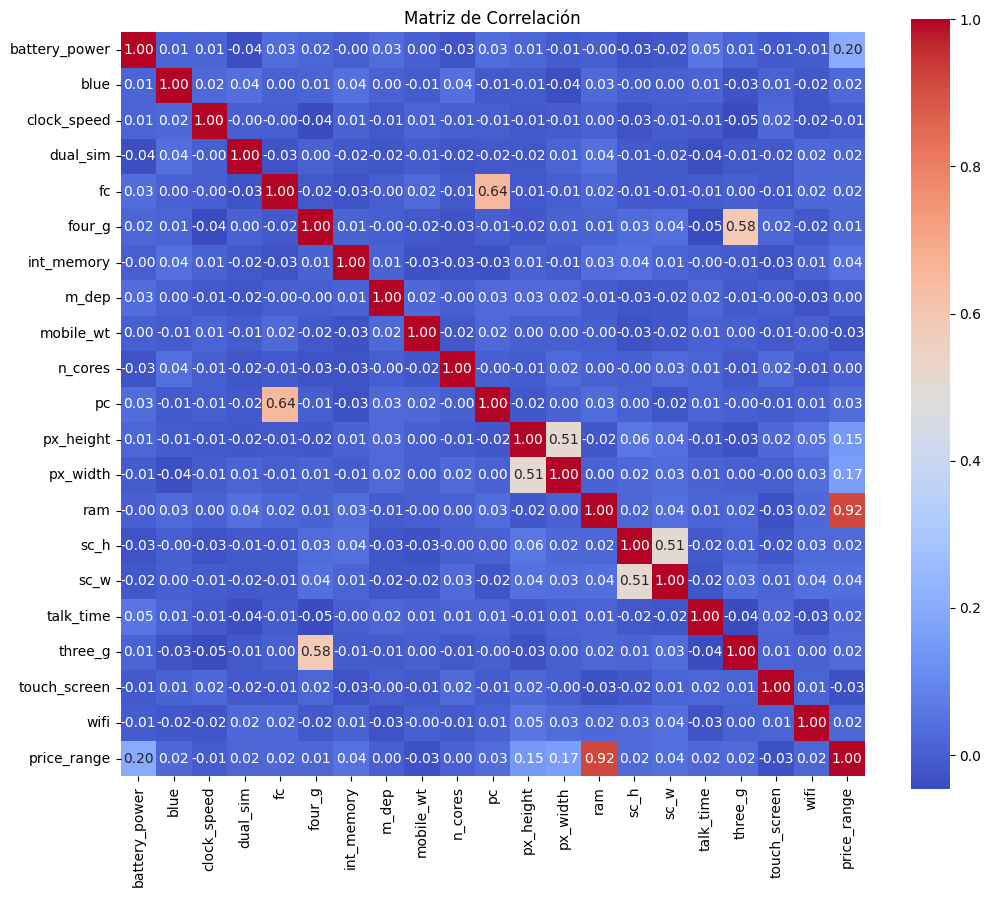


Frecuencia de clases en price_range:
price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64


In [23]:
# Matriz de correlaciones
numericas = data.select_dtypes(include=[np.number]).columns.tolist()
# numericas.remove('price_range')
corr = data[numericas].corr()

# Visualizacion de correlaciones numericas
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()

## Verificar balanceo considerando la variable de respuesta (price_range)
print("\nFrecuencia de clases en price_range:")
print(data['price_range'].value_counts(normalize=True))  # Proporciones

<Axes: title={'center': 'Correlación con price_range'}>

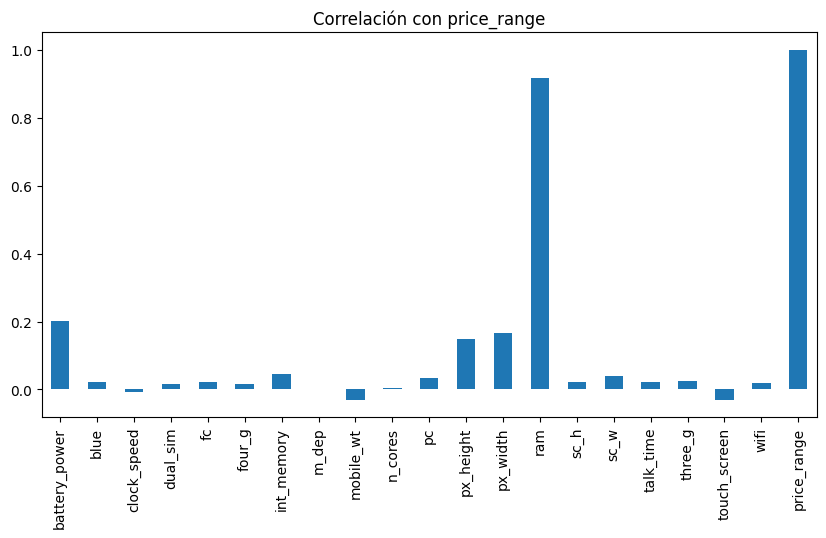

In [22]:
data.corrwith(data['price_range']).plot(kind='bar', figsize=(10, 5), title='Correlación con price_range')

## Variables catégoricas

### **1.2. Escriba el código para su análisis y la creación de gráficos de frecuencia:**


### **1.3. Escriba el código que permita validar si el dataset está balanceado**

## PREPROCESAMIENTO DE DATOS

In [ ]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [ ]:
#Verificar tamaño
data2.shape

(195, 14)

In [ ]:
# Separación de los datos en train y test
X = data2.drop(columns = 'price_range')
y = data2['price_range']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = seed,
                                        shuffle      = True
                                    )

### Escriba el código que permita reescalar todos los atributos del dataset utilizando la función del StandardScaler:

In [ ]:
# Código para reescalar X_train y X_test mediante StandardScaler

# 2. Aplicación de SVM sobre los datos

⚠️ Importante:

A partir de esta sección, utiliza los datos estandarizados.

### **2.1. Escriba el código que permita crear un modelo utilizando SVM con kernel lineal, el valor de C =1 y random_state=seed**

In [ ]:
# Creación del modelo SVM lineal
modeloSVM =

SVC(C=1, kernel='linear', random_state=1234)

In [ ]:
# Predicciones test
predictSVM = modeloSVM.predict(X_test)
predictSVM

### **2.2. Escriba el código que permita hallar la exactitud (accuracy) del modelo SVM anteriormente entrenado:**

### **2.3. Escriba el código que permita encontrar los mejores parámetros para el modelo  SVM, con un param_grid = {'C': np.linspace(0.1, 100, 20), 'kernel': ('linear', 'rbf')**

#### Ajuste de hiperparámetros (GridSearchCV)

⚠️ Restricción:

**No imprimas los resultados del GridSearchCV**. Solo utiliza los mejores parámetros encontrados.

In [ ]:
# Para que no se impriman los resultados, estos se asignan a _

### **2.4. Escriba el código que permita conocer los mejores parámetros encontrados en el ítem anterior**

### **2.5. Escriba el código que permita hallar la exactitud del modelo de SVM aplicando los mejores parámetros**

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
accuracy =

### **2.6. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

# 3. REDES NEURONALES

⚠️ Recordatorio:

* Mantén los datos normalizados (los mismos que usaste en SVM).
* No regreses al dataset original ni repitas pasos anteriores, a menos que se indique explícitamente.

### **3.1. Escriba el código que permita entrenar un perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas respectivamente en cada capa. Función de activación 'Relu' y random_state=seed**

In [ ]:
classifier =

### **3.2. Escriba el código que permita hallar la exactitud del modelo de redes neuronales anteriormente entrenado:**

### **3.3. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

### 4. **Conclusiones**

Escribe tus conclusiones finales, reflexionando sobre los resultados obtenidos con SVM y MLP. Compara los siguientes aspectos:

1. Métricas relevantes:

  * ¿Cuáles métricas fueron clave para evaluar el desempeño?

2. Fortalezas y limitaciones:

  * Ventajas y desventajas de cada modelo en este caso específico.